In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
df = pd.read_csv("E:\Bachelor Project\contest_data_v1\products-info_v1.csv", encoding='utf-8')
pd.index = df["id"]
df.head(10)

,id,category_name,titles,min_price,max_price,avg_price,min_num_shops,max_num_shops,avg_num_shops
0,1867826,میکروسکوپ,['میکروسکوپ اپتیکی سلسترون مدل 44121 CGL'],1900000.0,2082000.0,1.928314e+06,1,2,1.655303
1,419611,ماشین اسباب بازی,['ماشین بازی فورد موستانگ مایستو مدل 2015 Ford...,NaN,NaN,NaN,0,0,0.000000
2,288575,کتاب و مجلات,['کتاب راهنمای کاربردی عیب یابی و تعمیر موتور ...,65000.0,100000.0,7.396341e+04,1,2,1.743902
3,4614227,لپ تاپ و نوت بوک,['لپ تاپ مایکروسافت مدل سرفیس لپتاپ با پردازند...,43887600.0,48553000.0,4.648145e+07,1,1,1.000000
4,4108604,کتاب و مجلات,"['کتاب اقیانوسی در ذهن كلر وندرپول', 'اقیانوسی...",36660.0,74000.0,3.788296e+04,1,3,2.940000
5,3744855,هارد اکسترنال,"['ESD220C 120GB External SSD Drive', 'حافظه اس...",NaN,NaN,NaN,0,0,0.000000
6,2341058,بارکد خوان,"['بارکد اسکنر DATALOGIC مدل Heron HD3430', 'با...",75000.0,75000.0,7.500000e+04,0,1,0.769231
7,1719584,لنز دوربین,"['لنز FUJIFILM XF 16mm f/1.4 R WR', 'لنز Fujif...",29000000.0,29000000.0,2.900000e+07,1,2,1.947368
8,9149733,لنز دوربین,"['لنز فوجی Fujifilm XF 23mm f/1.4 R', 'لنز Fuj...",25000000.0,25000000.0,2.500000e+07,1,2,1.030303
9,1458592,لنز دوربین,"['لنز FUJIFILM XF 23mm f/2 R WR', 'لنز فوجی (F...",13500000.0,13500000.0,1.350000e+07,2,3,2.729730


**Basic Informations**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612277 entries, 0 to 3612276
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   category_name  object 
 2   titles         object 
 3   min_price      float64
 4   max_price      float64
 5   avg_price      float64
 6   min_num_shops  int64  
 7   max_num_shops  int64  
 8   avg_num_shops  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 248.0+ MB
None


**Checking for Missing Values:**

In [4]:
print(df.isnull().sum())

id                    0
category_name         0
titles                0
min_price        501154
max_price        501154
avg_price        501154
min_num_shops         0
max_num_shops         0
avg_num_shops         0
dtype: int64


Probably, these products that do not have a price are not available in the store

What should we do?!

**Top 10 Category plot**

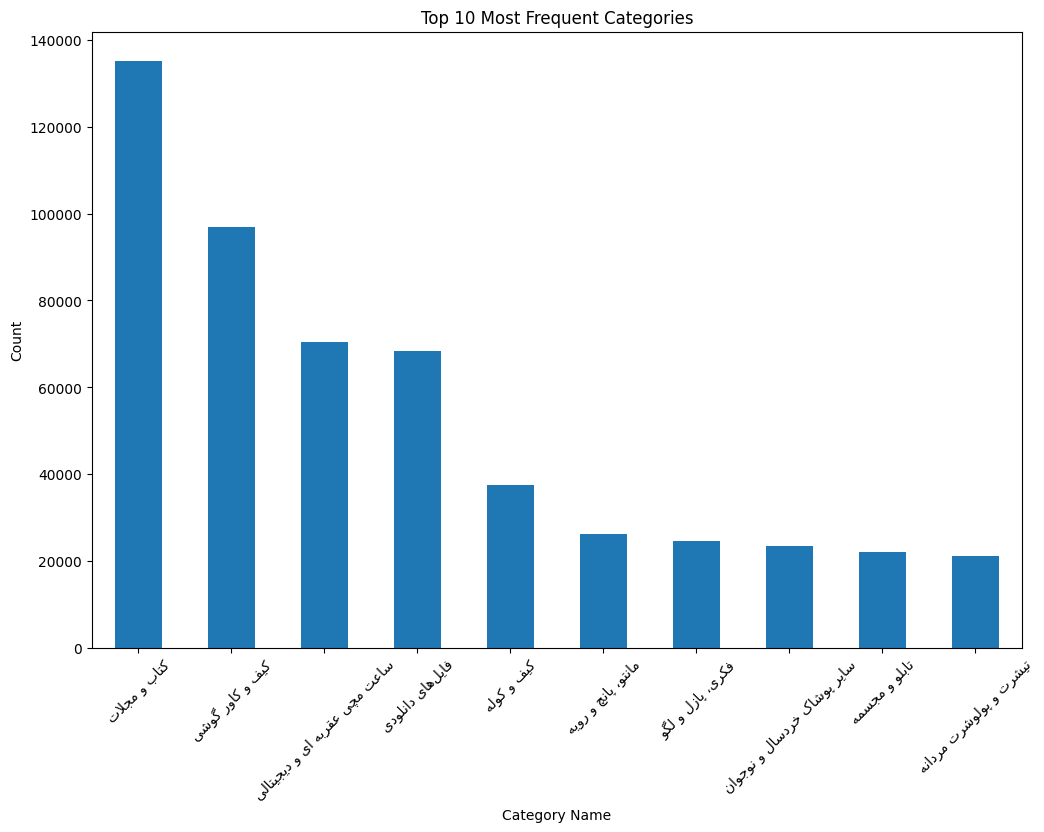

In [13]:
# Assuming the DataFrame is named df
# Step 1: Count occurrences of each unique category_name
category_counts = df['category_name'].value_counts()
# Step 2: Sort these counts (already sorted by value_counts)
# Step 3: Select the top ten most frequent categories
# Reshape the Arabic text in index for the plot labels
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in top_10_categories.index]
plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar')
# Set reshaped labels
plt.xticks(ticks=range(len(reshaped_labels)), labels=reshaped_labels, rotation=45)
plt.title('Top 10 Most Frequent Categories')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.show()

**Top 5 titles in each top 3 categories**

In [14]:
# Group by category_name and sort each group by avg_price in descending order
grouped = df.groupby('category_name', group_keys=False).apply(lambda x: x.sort_values('avg_price', ascending=False))
# Get the top 5 titles in each category
top_titles_in_categories = grouped.groupby('category_name').head(5)
# Get the top 3 categories based on the number of entries
top_categories = df['category_name'].value_counts().head(3).index
# Filter the top titles to include only those in the top 3 categories
top_titles_in_top_categories = top_titles_in_categories[top_titles_in_categories['category_name'].isin(top_categories)]
# Print the result
for category in top_categories:
    print(f"Category: {category}")
    print(top_titles_in_top_categories[top_titles_in_top_categories['category_name'] == category]['titles'])
    print("\n")

Category: کتاب و مجلات
25901      ['رییس جمهور روز جشن میلاد جولای 36 میلیمتری ب...
56120              ['کتاب Gravity Falls ژورنال 3 نسخه ویژه']
3505880    ['امگا اسپیدمستر سنسور هم محوری "قسمت تاریک ما...
1583178           ['کتاب مرجع کامل آموزش سروهای سری ProNet']
1657394                             ['کتاب اتوماسیون صنعتی']
Name: titles, dtype: object


Category: کیف و کاور گوشی
802115     ['قالب لاستیکی لمينت او سی ای سامسونگ SAMSUNG ...
3596853       ['قاب گوشی مدل Moshi Overture Case iPhone 13']
2194858    ['مورد محافظ نرم سیلیکون Nokia 3.1 Plus Black ...
2462636                             ['قاب مدل اپل چراغ دار']
2679604                           ['قاب موبایل اپل13پرومکس']
Name: titles, dtype: object


Category: ساعت مچی عقربه‌ ای و دیجیتالی
25839      ["Patek Philippe Aquanaut Men's Watch - 5167/1...
146086                ['ساعت مچی عقربه ای مردانه کد 116618']
25734                        ['PatekPhilippe Aquanau 5167A']
2798008    ['ساعت مچی مردانه Hublot Classic Fusion Chrono.

**Number of unique categories**

In [15]:
# Number of unique category_name values
unique_categories = df['category_name'].nunique()
print(f"Number of unique category names: {unique_categories}")

Number of unique category names: 3569


**How many products are there in each unique category?**

In each unique category, the lowest price of "min_price" of all products of that category and the highest price of "max_price" of all products of that category and the average price of "avg_price" of all products of each category.

The statistic of each unique categories

In [16]:
# Group by 'category_name' and calculate the required statistics
category_stats = df.groupby('category_name').agg(
    product_count=('id', 'size'),  # Counting the number of products
    lowest_min_price=('min_price', 'min'),
    highest_max_price=('max_price', 'max'),
    average_avg_price=('avg_price', 'mean')
).reset_index()
category_stats.to_csv("E:\Bachelor Project\workspace_products\category_stats.csv", index= False, encoding= "utf-8-sig")
category_stats.head()

,category_name,product_count,lowest_min_price,highest_max_price,average_avg_price
0,CD و DVD خام,346,1.0,14916600.0,2.385150e+05
1,ECU خودرو,305,2000.0,50900000.0,4.045644e+06
2,PCB ال ای دی,6,850.0,180000.0,5.949226e+04
3,آب انارگیری,12,119900.0,1090000.0,6.592056e+05
4,آب سردکن و تصفیه آب,14,2400000.0,5460000.0,3.930000e+06
